# Pneumonia Detection with Chest DICOM X-ray Images

This notebook was created by Elior Dadon as part of the Data Science workshop at the Open University of Israel, Tel-Aviv, Summer of 2023.

## Purpose and Objectives
My purpose in this project is to identify Pneumonia in chest DICOM X-ray images. This problem will be further developed into a App-like tool in an IDE for automation of the detection task.

My initial purpose for a project was to pick a project that solves an important problem, important in the context of helping others, whether it is a medical problem or a permenant one (like visually impaired individuals). Or a project that can help vast population. After in-depth research I came into 4 possible projects Ideas - 1. 'Visual aid for the Visually Impaired', 'Disaster Damage Detection', 'Skin Lesion Analysis' and 'Pneumonia Detection with chest x-ray images' which is the one I choose. All are importants and up to my general purpose, but due to dataset availability and personal conclusions, I prefered to go with Pneumonia detection for my university project and implement some of the mentioned projects as personal ones. The dataset that will be used is the RSNA Pneumonia Detection dataset.

I sincerely believe that solving such problem is very important. Being able to detect Pneumonia using automated tool can lead to shorten detection and diagnosis times, reduce human error, deal with much more cases than humans can deal with and most importantley save human life.

### Importance of the problem
Pneumonia is an infection that inflames lungs' air sacs (alveoli). The air sacs may fill up with fluid or pus, causing symptoms such as a cough, fever, chills and trouble breathing [^1]. Pneumonia is a leading cause of hospitalization and death worldwide, especially among children and elderly (those with weak immune systems). It accounts for more than 15% of deaths in children under the age of five years [^2]. Pneumonia is very common in underdeveloped and developing countries, where overpopulation, pollution, and unhygienic environmental conditions exacerbate the situations, and medical resources are poor. Threfore early and accurate detection can lead to effective treatment, reducing the mortality.

Manual detection of Pneumonia often relies on the expertise of radiologists to interpret X-ray images (most commonly). However, chest X-ray examinations for pneumonia detection are prone to subjective variability [^3, ^4], making the process time-consuming and subject to human error. Given the high prevalence of the condition and the critical nature of timely diagnosis, there is an increasing need for more efficient and accurate methods. Thus, an automated system for the detection of pneumonia is required. Machine learning algorithms can assist in automating this process, providing quick and reliable results, thereby augmenting the capabilities of healthcare professionals and potentially saving lives.

The *primary objective* of this research project is to engineer a machine learning algorithm with the capability to accurately classify chest radiographic images as indicative or non-indicative of pneumonia. This initiative transforms the diagnostic process into a *binary classification paradigm*, although as we gonna see, there will be an object detection process too, to not only check if there is pneumonia but also where.

### Classification - Detection Pipeline
We are going to use a classification - detection pipeline
#### Classification phase
In this phase, the focus is on analyzing each chest X-ray image to determine the likelihood of pneumonia presence. Each image undergoes a thorough evaluation, leading to a classification score that quantifies the probability of the disease's existence. This score plays a pivotal role, in prioritizing images for further, more detailed examination (the detection phase)
#### Detection phase
Following classification, images marked with higher scores proceed to the detection phase. Here, the task is to pinpoint the exact locations within the lungs where signs of pneumonia are evident, focusing particularly on areas flagged during the classification stage. The outcome is a set of bounding boxes highlighting specific regions in the lungs where pneumonia manifestations are detected.
#### Pipeline Integration
The classification phase sets the stage by filtering and prioritizing images. The detection phase, in turn, relies on these preliminary insights to focus its analysis.

### Chest X-ray images
Chest X-ray imaging, also known as chest radiography, is a cornerstone in modern diagnostic medicine. This imaging modality offers a two-dimensional snapshot of the thoracic cavity, encompassing the lungs, heart, and surrounding skeletal structures. While invaluable, the process of acquiring and interpreting these images is fraught with challenges and complexities.
#### The Imaging Process
The procedure entails directing a controlled burst of X-ray radiation through the chest region. A detector placed on the opposite side captures the resultant image. The distinct densities of various tissues within the thoracic cavity cause differential absorption of X-rays, translating into the familiar grayscale image of a chest X-ray.
#### Quality Control Measures
Given the critical diagnostic role of chest X-rays, stringent quality control protocols are in place. These include precise calibration of X-ray equipment, standardized patient positioning, and optimal exposure settings. Despite these measures, several factors can still compromise image quality:
- *Patient Movement:* Any movement during the imaging process can lead to blurring.
- *Incorrect Exposure:* Overexposure or underexposure can result in images that are too bright or too dark, respectively.
- *Artifacts:* Introduced by external objects like jewelry, clothing, or even medical implants.

#### Image Preprocessing
For the purposes of this project, preprocessing steps may be essential to adapt the images to a format suitable for machine learning models. Given that the RSNA Pneumonia Detection dataset contains images in DICOM format, initial preprocessing will involve converting these DICOM images to a more standard image format like JPEG or PNG for easier manipulation (remembering the important metadata).

Additional preprocessing steps could encompass:
- *Resizing:* Standardizing the image dimensions to suit the architecture of the chosen machine learning model (The specific models that I choose for this project will be descriped later on)
- *Normalization:* Scaling the pixel values to a standard range, usually between 0 and 1, to help the model learn more effectively.
- *Data Augmentation:* Techniques like rotation, flipping, and zooming may be employed to artificially expand the dataset and improve model generalization (the exact augmentation techniques are explored and described later on)
- *Bounding Box Handling:* Since the dataset includes bounding box coordinates, these will need to be processed and matched to the corresponding images to serve as labels for the supervised detection learning model.


### Challenges with DICOM Images in Pneumonia Detection
#### Variability in Disease Presentation
Just like traditional X-ray images, DICOM images in this dataset can show varying presentations of pneumonia. The challenge dataset comes with bounding boxes to highlight areas of concern, but the variability still adds complexity to model training and validation.
#### Bounding Box Variability
The training data is annotated with bounding boxes that indicate areas of pneumonia. However, a single DICOM image may have multiple bounding boxes, adding another layer of complexity to both the model training and evaluation process.
#### Overlapping Anatomy
DICOM images, like traditional X-ray images, offer 2D representations of 3D structures, causing overlapping of anatomical features. This overlap can make it challenging to distinguish between different types of tissues and can obscure areas of concern, such as pneumonia affected regions.
#### Inter-reader Variability: The Human Factor
The challenge dataset has annotations that were presumably reviewed by medical experts. However, different radiologists may interpret the same DICOM image in varying ways, introducing a subjective element into the diagnostic process. Therefore, the model must aim for a standardized, objective method of evaluation.
#### Data Imbalance
The dataset contains both positive and negative examples, but the distribution may not be equal. Data imbalance could lead to a model that is biased towards the majority class, affecting its performance on under-represented classes. Please note that for the detection part this might not be a problem.
#### Ethical Implications of Automation
As we aim for an automated system for diagnosis, ethical considerations become increasingly important. A false positive or negative could significantly impact patient care, making the need for a highly accurate and interpretable model paramount.

These challenges will serve as focal points for our machine learning model development. We will be particularly mindful of issues like bounding box variability, disease presentation variability, and inter-reader variability when designing our feature extraction strategies and model evaluation metrics.

### Solution Evaluation
### Classification
For the classification component of this project, the evaluation metric will be the Area Under the Receiver Operating Characteristic Curve (AUC-ROC).

The ROC curve is a graphical representation that illustrates the performance of a binary classifier as its discrimination threshold is varied. The curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. AUC measures the area underneath the ROC curve and serves as a single scalar value that summarizes the performance of the classification model.

The AUC value ranges from 0 to 1, where a model with an AUC close to 1 indicates strong predictive power. Specifically, AUC can be interpreted as the probability that a randomly selected positive instance is ranked higher than a randomly selected negative instance by the classifier.
AUC=Probability(Classifier ranks a positive instance higher than a negative one)

#### Importance in Pneumonia Detection
In the realm of medical diagnostics, and pneumonia detection in particular, false negatives can be exceptionally dangerous. They could lead to delayed or missed treatment, exacerbating a potentially life-threatening condition. Conversely, false positives, while also a concern, may lead to unnecessary tests or treatments but are generally considered less harmful than false negatives. The AUC-ROC metric is well-suited for this balance, as it considers both the sensitivity (true positive rate) and specificity (true negative rate) of the model. By aiming for an AUC as close to 1 as possible, we strive for a model that minimizes these risks effectively.

### Detection
Part of the primary objective of this project is to accurately detect the presence of pneumonia based on chest X-ray images, which involves predicting bounding boxes around areas of the lungs where pneumonia is likely to be present. The evaluation metric for this project is the mean Average Precision (mAP) at various Intersection over Union (IoU) thresholds, as specified by the RSNA Pneumonia Detection competition.
#### Why mean Average Precision (mAP) at IoU?
Mean Average Precision at different Intersection over Union (IoU) thresholds is particularly well-suited for object detection problems where the location of the object is as important as its classification. In the context of pneumonia detection, it is crucial not only to identify whether pneumonia is present but also to localize it within the lung area.
- **Intersection over Union (IoU):** IoU is a measure of the overlap between two bounding boxes, A and B. It's calculated using the formula: 

$$\text{IoU}(A, B) = \frac{A \cap B}{A \cup B}$$
- **Average Precision (AP):** At each IoU threshold value *t*, a precision value is calculated based on the number of true positives (TP), false negatives (FN), and false positives (FP) using the formula:

$$\frac{\text{TP}(t)}{\text{TP}(t) + \text{FP}(t) + \text{FN}(t)}$$
- **Mean Average Precision (mAP):** The final score is calculated as the mean of the average precision values across the different IoU thresholds:

$$\text{mAP} = \frac{1}{\text{|thresholds|}} \times \sum_{t} \frac{\text{TP}(t)}{\text{TP}(t) + \text{FP}(t) + \text{FN}(t)}$$

#### Importance in Pneumonia Detection
In the context of pneumonia detection, a false negative could delay treatment for a potentially life-threatening condition, while a false positive might lead to unnecessary treatment and patient anxiety. The mAP metric is well-suited for this problem as it considers both precision and recall, and it takes into account the quality of the bounding box predictions. This ensures a balance between avoiding false negatives and minimizing false positives.

By focusing on achieving a high mAP score, we aim to develop a machine learning model that is both sensitive and specific in detecting and localizing pneumonia in DICOM chest images.

## Data Exploration and Initial Inspection
Data was sourced from [Kaggle](https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge/data).
#### Data structure
The dataset is structred into folders, each containing DICOM images:
- 'train_dicoms/': contains the DICOM images for the training set
- 'test_dicoms/' : contains the DICOM images for the testing set

#### Training data
In addition to the DICOM images, the data includes two CSV files:

'train_labels.csv': this csv file contains the main training dataset. Each row in this file corresponds to a unique bounding box in an image and contains the following columns:
- 'patientId' : A unique identifier for each patient
- 'x', 'y', 'width', 'height': Coordinates and dimensions of a bounding box around the pneumonia region in the image
- 'Target': A binary label indicating the presence (1) or absence (0) of pneumonia.

'detailed_class_info.csv': this csv file contains detailed information about the positive and negative classes in the training set, and may used to build more nuanced models. Columns:
- 'patientId' : A unique identifier for each patient
- 'class' : This colmun provides more specific information about the type of image. It can have one of the following three categories:
    1. Normal: Indicates that the lung is healthy and there are no signs of abnormalities.
    2. No Lung Opacity / Not Normal: Suggests that although there is no lung opacity indicative of pneumonia, there are other abnormalities present in the lung
    3. Lung Opacity: Indicates the presence of and area of the lung that looks lighter (or "whiter") on the X-ray, which is a sign of pneumonia.
    
    The first two classes correspond to Target = 0, whereas the third class correspond to Target = 1.

#### Notes
- Note that there are no labels for the testing set, as this dataset is from Kaggle challenge and challenges do not provide labels for the testing set. What it means for us is that we will use the training set for the validation and the test set as well.
- Note that there may be multiple rows in the 'train_labels.csv' per patientId. Reason is because there might be multiple bounding boxes per one image.
- The file detailed_class_info.csv contains additional information that complements the train_labels.csv file. Both files have the same number of rows because each row in train_labels.csv corresponds to a unique bounding box (or lack thereof) in an image, while each row in detailed_class_info.csv provides more nuanced classification for that bounding box. In essence, these two files are designed to be used together: train_labels.csv tells where the bounding box is and whether pneumonia is present, while detailed_class_info.csv gives more context about that diagnosis. The approach in this work will be not to combine those files; 'detailed_class_info.csv' will be for the classification part and 'train_labels.csv' for the detection.

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt  # plotting graphs and visualizations
from matplotlib.patches import Rectangle  # drawing rectangles
import seaborn as sns  # visualizations
import numpy as np  # numerical computing
import pydicom  # reading DICOM files
import pandas as pd  # data manipulation & analysis
from glob import glob  # file operations
import os  # interacting with the operating system
from PIL import Image  # image handling
from tqdm.notebook import tqdm  # for progress bar
import random  # random sampling
import pylab  # colormap
import cv2  # image manipulation
import multiprocessing  # for parallel processing
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

TRAIN_DATADIR = 'data/'

Let's define paths for the dicom images, boxes & target and the labels

In [13]:
path_to_train_dicoms_dir = os.path.join(TRAIN_DATADIR, 'train_dicoms')
path_to_boxes_file = os.path.join(TRAIN_DATADIR, 'train_labels.csv')
path_to_labels_file = os.path.join(TRAIN_DATADIR, 'detailed_class_info.csv')

## Bounding Boxes and Target Label Data
As described in the intro, the file 'train_labels.csv' containts the main training dataset, including the patient ID, the bounding box coordinates, and the target label [0,1]. As mentioned, there can be multiple rows for the same patiend ID, as each row corresponds to one observation (one box) per patient.

This file will be used in the detection part of the pipeline, as it contains the bounding boxes we wish to detect.

Let's inspect the 'train_labels.csv' file, let's load it as a pandas Dataframe

In [7]:
box_df = pd.read_csv(path_to_boxes_file)

Let's see that it have the same structure as desribed - patientId, x, y, width, height, Target.
Let's also see the number of unique patient IDs and number of boxes. Remember that there might be multiple boxes per one patient-image, so we expect more bounding boxes than unique patient IDs

In [8]:
print(f'Number of rows (unique boxes per patient) in train dataset:', box_df.shape[0])
print(f'Number of unique patient IDs:', box_df['patientId'].nunique())
box_df.head(10)

Number of rows (unique boxes per patient) in train dataset: 30227
Number of unique patient IDs: 26684


,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


As expected, there are more bounding boxes (30227) than patient IDs (26684).

Now let's see the distribution of the Target - how many samples are Pneumonia(1) or nonPneumonia(0).
To not affect the original dataframe of the labels and still make the visualization (and further visualizations) clearer, a copy of the dataframe is appropriate.

In [9]:
# copy original dataframe
box_df_copy = box_df.copy()
# replace Target column to bool for clearer visualizations
box_df_copy['Target'] = box_df_copy['Target'].apply(lambda x: 'nonPneumonia' if x == 0 else 'Pneumonia')

Now let's proceed with the distribution.
We at the distribution of the entire dataset and not for unique patient ID's, as this file is for the detection part in the pipeline. (#### THIS SENTENCE FEEL WRONG MAYBE ####)

2023-10-01 23:23:01,284 - INFO - NumExpr defaulting to 8 threads.


Target
Pneumonia       31.610812
nonPneumonia    68.389188
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

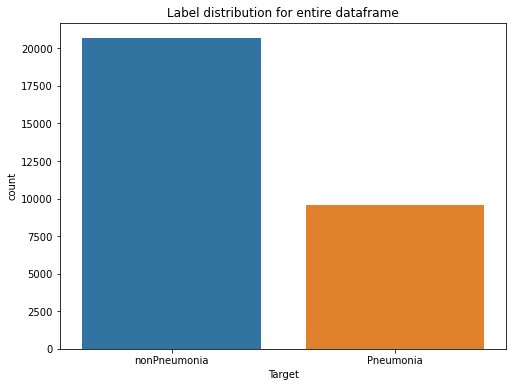

In [6]:
# distribution for the entire dataframe
print(box_df_copy.groupby('Target').size() / box_df_copy.shape[0] * 100)
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=box_df_copy)
plt.title('Label distribution for entire dataframe')
plt.xlabel('Target')
plt.show

Looking at the distribution across the entire dataframe, we find that roughly 31.6% of the entries are tagged as 'Pneumonia,' while the rest, about 68.4%, fall under 'nonPneumonia.' At first glance, you might think this indicates a class imbalance issue. However, it's worth noting that in object detection tasks, the notion of class imbalance is a bit different than in classification tasks. Here, the 'nonPneumonia' instances largely represent background or 'non-events,' which are naturally more frequent than the actual objects ('Pneumonia') we want to detect. This kind of imbalance is not only expected but also inherent to the problem we're trying to solve.

The bar plot offers a visual confirmation of this distribution. While in a classification context this might prompt us to consider techniques like data augmentation or re-sampling to balance the classes, in object detection, this is a normal and expected distribution. Many object detection models have built-in mechanisms to handle this kind of scenario effectively.

Before moving on, let's perform a quick consistency check on our data. We want to ensure that if the Target is 1 (indicating pneumonia), then the bounding box coordinates (x, y, width, height) should all be non-null. Conversely, if the Target is 0, then these coordinates should be null. This helps us confirm that the bounding boxes are only present where they should be.

In [7]:
# check where there's null values
box_df.isnull().any()

patientId    False
x             True
y             True
width         True
height        True
Target       False
dtype: bool

As expected, only the boxes dimensions should contain null values.
Now let's make sure that positive targets are all associated with (non-NaN) box coordinates and viceversa.

In [8]:
# when target==1, are any of the box coordinates null? (should all be false)
box_df.loc[box_df['Target']==1, ['x', 'y', 'width', 'height']].isnull().any()

x         False
y         False
width     False
height    False
dtype: bool

In [9]:
# when target==0, are all of the box coordinates null? (should all be true)
box_df.loc[box_df['Target']==0, ['x', 'y', 'width', 'height']].isnull().any()

x         True
y         True
width     True
height    True
dtype: bool

The verification process went successfully, everything went as expected. let's move on to the file which will be used in the classification part of the pipeline.

## Detailed Class Info Data
As described in the intro, the file 'detailed_class_info' contains detailed information about the positive and negative classes in the training set. In the training part, there's possability we will train on 2 classes or use the more detailed information - train on 3 classes - for more nuanced models, or just do both. 

This file will be used in the classification part of the pipeline. 

Let's load it and inspect this file a bit.

In [10]:
labels_df = pd.read_csv(path_to_labels_file)

Let's verify the structure described - Normal, No Lung Opacity / Not Normal, Lung Opacity.

In [11]:
print(f'box dataframe: {box_df.shape[0]}')
print(f'labels dataframe: {labels_df.shape[0]}')
labels_df.head(10)

box dataframe: 30227
labels dataframe: 30227


,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


As expected, the 'detailed_class_info.csv' file contains the same number of rows (30,227) as 'train_labels.csv', as explained in the 'Training Data' sub-section.

However, we intend to use this file for the classification part of our work. Therefore, removing duplicates is crucial. The reason is that we want to create a dataset for the classification task where each unique patient ID corresponds to a single label.

In [11]:
# remove duplicates
unique_labels_df = labels_df.drop_duplicates()
# save as a new csv file
unique_labels_df.to_csv(os.path.join(TRAIN_DATADIR, 'detailed_class_info_unique.csv'), index=False)
print('box dataframe, unique patient ID\'s:', box_df['patientId'].nunique())
print('labels dataframe:', unique_labels_df.shape[0])

box dataframe, unique patient ID's: 26684
labels dataframe: 26684


Great, we got the same rows per unique patient Id which is exactly what we wanted.

Now we can move to the distribution of the 'detailed_class_info', here, however, the imbalance factor will be important, as this file is going to be used for the classification part.

As already mentioned in the intro of this section, we might train models on 3 classes or 2 classes or both. Thus let's check distribution of both cases.

First we going to see the distribution of all 3 classes

class
Lung Opacity                    22.530355
No Lung Opacity / Not Normal    44.299955
Normal                          33.169690
dtype: float64


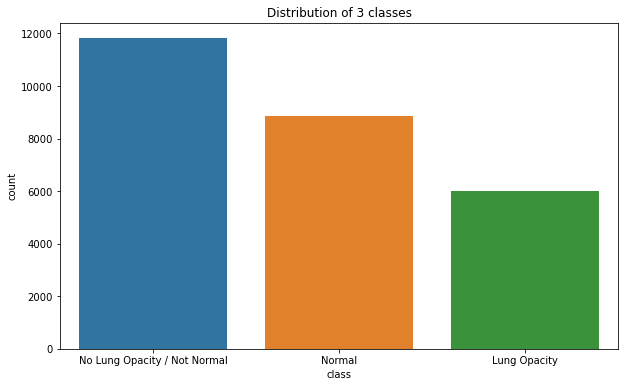

In [13]:
# plotting the distribution of all 3 classes
print(unique_labels_df.groupby('class').size() / unique_labels_df.shape[0] * 100)
plt.figure(figsize=(10, 6))
sns.countplot(data=unique_labels_df, x='class')
plt.title('Distribution of 3 classes')
plt.show()

From the plot and percentages, we observe the following distribution:

    'Lung Opacity' makes up about 22.5% of the dataset.
    'No Lung Opacity / Not Normal' accounts for approximately 44.3%.
    'Normal' cases constitute around 33.2%.

As we can see, the classes are not equally distributed. While 'No Lung Opacity / Not Normal' is the most frequent class, 'Lung Opacity' is the least frequent. This imbalance could potentially bias the model towards predicting the majority classes more often than the minority class, which is not ideal for medical diagnostics where every condition is crucial.

since we are considering using this data for classification, addressing the imbalance might help in achieving better performance.

To deal with this imbalance, we might consider resampling techniques or data augmentation methods to balance the classes later on.

Now let's see the distribution of 2 classes, remember that 'No Lung Opacity / Not Normal', 'Normal' indicate non Pneumonia, while Lung Opacity indicate Pneumonia

class
Pneumonia       22.530355
nonPneumonia    77.469645
dtype: float64


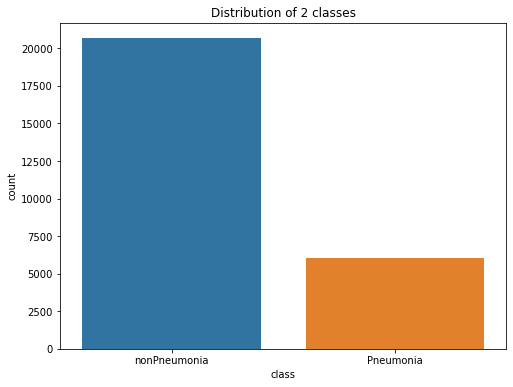

In [14]:
unique_labels_df_2class = unique_labels_df.copy()
unique_labels_df_2class['class'] = unique_labels_df_2class['class'].apply(lambda x: 'nonPneumonia' if x != 'Lung Opacity' else 'Pneumonia')
print(unique_labels_df_2class.groupby('class').size() / unique_labels_df_2class.shape[0] * 100)
plt.figure(figsize=(8, 6))
sns.countplot(data=unique_labels_df_2class, x='class')
plt.title('Distribution of 2 classes')
plt.show()

Based on this new categorization, our dataset shows the following distribution:

    'Pneumonia' cases make up about 22.5% of the dataset.
    'nonPneumonia' cases account for the remaining 77.5%.

We can see that the dataset is quite imbalanced when it comes to a binary classification task. About three-quarters of the cases are 'nonPneumonia', which could lead our model to become biased toward predicting this majority class.

As mentioned for the 3 classes, but especially in this case, we should definetly consider resampling techniques or data augmentation methods to balance the classes later on.

Before moving on, let's make some assertions. We need to make sure that when 'Target' == 0 in the 'train_labels.csv' then it corresponds to 'Normal' or 'No Lung Opacity / Not Normal', and if 'Target' == 1 then it corresponds to 'Lung Opacity'

In [15]:
# assert that the number of rows in box_df where 'Target' == 0 is equal to the number of rows in labels_df where 
# 'class' == 'Normal' or 'class' == 'No Lung Opacity / Not Normal'
assert box_df.loc[box_df['Target']==0].shape[0] == labels_df.loc[labels_df['class'].isin(['Normal', \
    'No Lung Opacity / Not Normal'])].shape[0], 'Number of negative targets does not match between main and detailed dataset'
# 'Target' == 1 -> 'class' == 'Lung Opacity'
assert box_df.loc[box_df['Target']==1].shape[0] == labels_df.loc[labels_df['class'] == 'Lung Opacity'].shape[0], \
    'Number of positive targets does not match between main and detailed dataset'

Great, all assertions went successfully. We can move on.

## Radiograph Images
The radiograph images are stored in the folder train_dicoms. The images are saved in DICOM format (.dcm), which includes a header of meta-data and the raw pixel image itself. Images are named using their corresponding patient ID. Images can be read in and modified using the library [pydicom](https://pydicom.github.io/). The headers of meta-data have been mostly anonymized for patient privacy, but they still contain a bunch of useful information that could be used to improve the classification model.

Let's inspect those images, and make some actions with / on them.

Let's start by looking at some filenames, verify that it have the format of patientId.dcm

In [16]:
# get a list of all filenames in the dicom images directory
images_names = os.listdir(path_to_train_dicoms_dir)
# sample of image filenames
sample_image_names = images_names[:6]
print('Sample image filenames:')
for name in sample_image_names:
    print(f'- {name}')

Sample image filenames:
- 0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm
- 000924cf-0f8d-42bd-9158-1af53881a557.dcm
- 000db696-cf54-4385-b10b-6b16fbb3f985.dcm
- 000fe35a-2649-43d4-b027-e67796d412e0.dcm
- 001031d9-f904-4a23-b3e5-2c088acd19c6.dcm
- 0010f549-b242-4e94-87a8-57d79de215fc.dcm


Alright, as expected, images are named using their corresponing patient ID.

Before diving into the image data, it's crucial to ensure that our dataset is consistent. Specifically, we want to verify that there's a one-to-one mapping between the unique patient IDs in our CSV files and the image files. This step will help us confirm that we're not missing any data and that each patient's information aligns perfectly across different data sources.

In [17]:
# check that there is an image for each unique patient ID, f[:-4] excludes the format '.dcm' for patient id only.
assert sorted(unique_labels_df['patientId'].tolist()) == sorted([f[:-4] for f in os.listdir(path_to_train_dicoms_dir)]), \
    'The list of unique patient IDs doesn\'t match the list of image filenames (without format format). Check the discrepancy'

Great, we have a consistent dataset.

Let's continue with the inspections.
Let's extract the sample raw pixel image and look at its properties. To access the raw image we going to use the pixel_array of the dicom image (because it contains other meta-data which we will deal with later).

In [18]:
# get a sample of patient id
pid = labels_df['patientId'].sample(1).values[0]
# get the sample dicom image meta data
dcm_data = pydicom.read_file(os.path.join(path_to_train_dicoms_dir, f'{pid}.dcm'))
# extract raw pixel image from the sample 
dcm_img = dcm_data.pixel_array
# type
print(type(dcm_img))
# data type
print(dcm_img.dtype)
# shape 
print(dcm_img.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


After examining a sample image, we find that the image is stored as a NumPy array with a shape of 1024×1024 (no third dimension for color channels) and a data type of uint8 (single value ranged from 0 to 255). This means that each image is a grayscale representation, where each pixel's intensity is represented as an 8-bit unsigned integer. The large dimensions indicate that the images are high-resolution, providing a significant amount of detail.

Given the high resolution of 1024×1024 of the original images, we're presented with a computational challenge. Larger images offer more details but also require more computational resources. For instance, the image size directly affects the size of the activation maps and gradients in each layer, influencing GPU memory needs. Also, the effective receptive field of the neural network comes into play. Smaller images may require fewer layers to capture the same amount of information as larger images.

Considering these factors and the limitations of my computational resources, I'll be resizing the images to 256x256 and 320x320 pixels for this project. These sizes are frequently used in medical imaging tasks and offer a good balance between detail and computational efficiency. We will undertake this resizing step during the data preprocessing phase, before the actual training of the models. Note that the sizes described here might be different, and might be specifically different for the different parts (classification / detection).

Although not a requirement, it's very important that all the images have the same shape, especially because the plan is to use mini-batches during model training. Inconsisted image dimensions could lead to errors or require additional preprocessing steps that can complicate the pipeline.

In [21]:
# RUN THIS CELL AGAIN ONLY BEFORE COMPLETION, YOU RUN THIS ALREADY AND CHECKED EVERYTHING IS FINE
# check that all images have the same resolution
unique_shapes = set()
# loop through the images names list
for image_name in images_names:
    # read the dcm file
    dcm_data = pydicom.read_file(os.path.join(path_to_train_dicoms_dir, image_name))
    # get the raw pixel image
    dcm_img = dcm_data.pixel_array
    # add the image shape
    unique_shapes.add(dcm_img.shape)
# assert that there's only one shape
assert len(unique_shapes) == 1, f'Multiple shapes found {unique_shapes}'

Great. all images have the same resoultion.

### Extract useful meta-data from dicom headers
Let's dive into the DICOM metadata for a random patient to understand what kind of information is available to us. Each DICOM file contains not only the raw image but also a header filled with metadata. This metadata is a rich source of information that can potentially help in improving our models.

In [22]:
# have a look at the sample metadata
print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.8203.1517874336.95544
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.8203.1517874336.95544
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time          

The metadata is organized as a list of key-value pairs. Each key is a tag that represents a particular DICOM attribute, and the value contains the data for that attribute. Here are some attributes that worth talking about:

   - Patient's Age: Age is a well-known risk factor for various diseases, including respiratory conditions. For example, older individuals may be more susceptible to certain types of pneumonia or other lung issues. Thus, age could be an important feature for identifying patterns or trends in the data that could be useful for classification.
   - Patient's Sex: Some diseases exhibit different patterns between males and females due to a variety of factors, including hormonal differences, lifestyle factors, and genetic predispositions. Thus, sex can also be useful for classification.
   - Body Part Examined: This confirms that the images are of the chest.
   - View Position: Indicates the orientation of the image, another potentially useful feature.
   - Rows and Columns: Gives us the dimensions of the image.
   - Pixel Spacing: Indicates the physical distance between the centers of each two-dimensional pixel.

It's worth noting that some fields have been anonymized for patient privacy, like the 'Study Date', which is set to a placeholder value.

After examining the DICOM metadata, the decision is to focus on extracting a select set of attributes that are clinically relevant for our task: 'Patient's Age,' 'Patient's Sex,' and 'View Position.' You might wonder why we're not including all the available metadata. Well, the reason is straightforward. Many of the other metadata fields, like 'Transfer Syntax UID' or 'Media Storage SOP Instance UID,' are more about the technical aspects of how the image was stored and transmitted. While these details are crucial for the DICOM format and medical imaging technology, they don't necessarily provide any meaningful insights into whether a patient has pneumonia.

Moreover, some fields have been anonymized to protect patient privacy (like 'Study Date'), making them uninformative for our modeling task. So, we've zeroed in on the metadata attributes that could potentially help us build a more accurate and insightful classification model.

Let's extract the desired meta-data of each image

In [12]:
# extract metadata (manually chose after checking which attributes contained valuable information) per patient id
def extract_metadata(pid):
    dcm_path = os.path.join(path_to_train_dicoms_dir, f'{pid}.dcm')
    dcm_data = pydicom.read_file(dcm_path)
    
    metadata = {
        'patientId': pid,
        'PatientAge': dcm_data.PatientAge,
        'PatientSex': dcm_data.PatientSex,
        'ViewPosition': dcm_data.ViewPosition
    }
    return metadata

# check for jupyter re-run if metadata dataframe already created before
if not os.path.exists(os.path.join(TRAIN_DATADIR, 'metadata.csv')):
    # apply extraction for every patient Id in the unique dataset to create metadata dataframe
    metadata_df = unique_labels_df['patientId'].apply(extract_metadata).apply(pd.Series)
    # save a csv file ################## MAYBE YOU SHOULD SAVE AFTER DOING THE NEXT MODIFICATIONS!!! ######
    metadata_df.to_csv(os.path.join(TRAIN_DATADIR, 'metadata.csv'), index=False)
    # convert patient age from string to numeric
    metadata_df['PatientAge'] = metadata_df['PatientAge'].apply(pd.to_numeric, errors='coerce')
    # remove a few outliers
    metadata_df['PatientAge'] = metadata_df['PatientAge'].apply(lambda x: x if x<120 else np.nan)
    # fill the nan values (if there's any) with median
    median_age = metadata_df['PatientAge'].median()
    metadata_df['PatientAge'].fillna(median_age, inplace=True)
else:
    # load if already exists
    metadata_df = pd.read_csv(os.path.join(TRAIN_DATADIR, 'metadata.csv'))

metadata_df.head(6)

,patientId,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,51,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,48,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,19,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,28,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,32,F,AP
5,00569f44-917d-4c86-a842-81832af98c30,54,M,AP


We have successfully extracted essential metadata attributes for each unique patient ID in our dataset.

The next logical step is to merge this metadata dataframe with our unique labels dataframe. This will enable us to examine how these metadata attributes correlate with the presence or absence of pneumonia, as well as the level of severity (for the three-class problem).

Let's merge with the original 3 classes dataframe

In [13]:
# for jupyter re-run
if not os.path.exists(os.path.join(TRAIN_DATADIR, 'merged_unique_labels_meta.csv')):
    # merging unique-patient-ids 3 classes dataframe with the metadata dataframe
    merged_meta_unq_labels_df = pd.merge(unique_labels_df, metadata_df, on='patientId')
    # save as a csv file
    merged_meta_unq_labels_df.to_csv(os.path.join(TRAIN_DATADIR, 'merged_unique_labels_meta.csv'), index=False)
# load if already exists
else:
    merged_meta_unq_labels_df = pd.read_csv(os.path.join(TRAIN_DATADIR, 'merged_unique_labels_meta.csv')

merged_meta_unq_labels_df.head(6)

,patientId,class,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,51,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,48,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,19,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,28,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,32,F,AP
5,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,54,M,AP


Alright, we've got our data merged and it's looking good. Next up, let's dive a bit deeper into this new information we have — age, sex, and the view position of the X-ray.

Why do we care about these things? Well, they could give us some clues on patterns. Like, are older people more prone to certain types of pneumonia? Does the patient's sex play a role? And what about the angle of the X-ray—does it make a difference in diagnosing pneumonia?

We're going to run some statistics to answer these questions. This will help us figure out if these new attributes are just random variables or if they can actually tell us something useful for our classification model down the line.

Let's start with the age distribution among the different classes

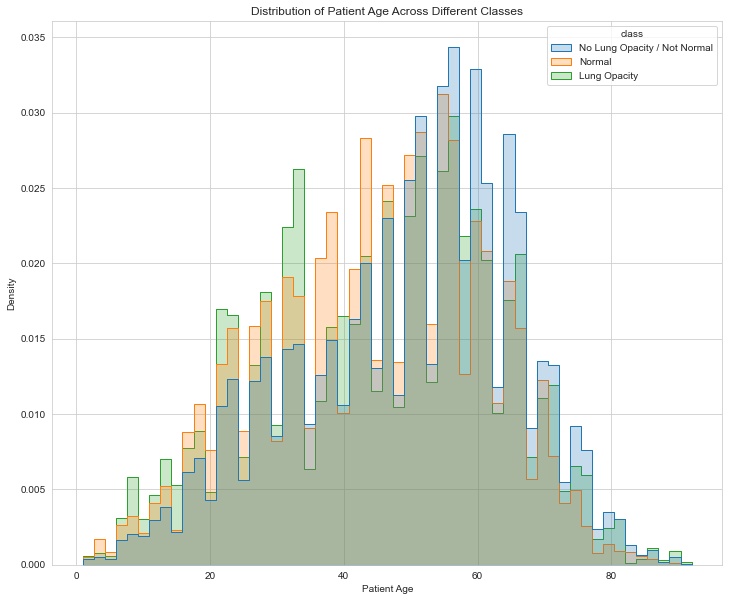

In [32]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 10))
sns.histplot(data=merged_meta_unq_labels_df, x='PatientAge', hue='class', element='step', stat='density', common_norm=False)
plt.title('Distribution of Patient Age Across Different Classes')
plt.xlabel('Patient Age')
plt.ylabel('Density')
plt.show()

Based on the distribution plot of patient ages across different classes, we can observe some interesting trends.

   - Younger Patients (0-20 years): There's a small peak in the 'Normal' class around the ages of 0-4, suggesting very young patients often get classified as normal. The 'Lung Opacity' class also seems to have some representation in this age group, but less so than the 'Normal' class.

   - Young Adults (21-40 years): In this age range, both 'Normal' and 'Lung Opacity' classes seem to be well-represented. The 'Lung Opacity' class appears to have a slightly higher density, especially around the ages of 31-35.

   - Middle-aged Adults (41-60 years): The density of the 'Normal' class appears to peak around the ages of 41-50, after which the 'No Lung Opacity / Not Normal' class takes over as the most frequent class. The latter class reaches its highest density around ages 51-60.

   - Older Adults (61-80+ years): In this age group, the 'No Lung Opacity / Not Normal' class is the most represented, especially between the ages of 60-62. After this age range, all classes seem to decrease in density, suggesting fewer cases in the dataset for older individuals.

It's evident that the classes are not uniformly distributed across ages, which may be an important consideration when building our predictive models.

After analyzing the distribution of patient ages across different classes, we'll now focus on understanding how age correlates with each class. We'll perform a correlation check to quantify the relationship between 'PatientAge' and the three different classes: 'No Lung Opacity / Not Normal', 'Normal', and 'Lung Opacity'. This will help us gauge the importance of age as a feature for our upcoming predictive models. Let's dive into the correlation analysis.

In [33]:
# one-hot encode the 'class' column
one_hot = pd.get_dummies(merged_meta_unq_labels_df['class'])

# merge one-hot encoded columns with the original dataframe
merged_with_one_hot = pd.concat([merged_meta_unq_labels_df, one_hot], axis=1)

# calculate the Pearson correlation matrix
correlation_matrix = merged_with_one_hot.corr()

# display the correlation between age and each class
print(correlation_matrix.loc['PatientAge', ['No Lung Opacity / Not Normal', 'Normal', 'Lung Opacity']])

No Lung Opacity / Not Normal    0.122731
Normal                         -0.088680
Lung Opacity                   -0.045988
Name: PatientAge, dtype: float64


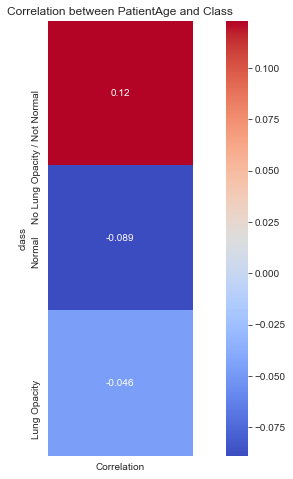

In [36]:
corr_df = pd.DataFrame({
    'class': ['No Lung Opacity / Not Normal', 'Normal', 'Lung Opacity'],
    'Correlation': [0.123, -0.089, -0.046]
})

plt.figure(figsize=(12, 8))
sns.heatmap(corr_df.set_index('class'), annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation between PatientAge and Class')
plt.show()

Based on the correlation coefficients, we can make the following observations:

   - The class 'No Lung Opacity / Not Normal' has a positive correlation of 0.123 with 'PatientAge'. Although it's a low correlation, it suggests that as age increases, there's a slight tendency for cases to be classified as 'No Lung Opacity / Not Normal'.

   - The class 'Normal' has a negative correlation of -0.089 with 'PatientAge'. This suggests a small tendency for younger patients to be classified as 'Normal', although the correlation is fairly weak.

   - The class 'Lung Opacity' has a negative correlation of -0.046 with 'PatientAge', which is very weak and almost negligible.

These correlation values indicate that while age might have some influence on the classification, it's not a very strong determinant. Therefore, while it may be a useful feature to include in our predictive models, we should not over-rely on it for classification.

Let's move to the patient sex, let's understand the distribution of sex within each class

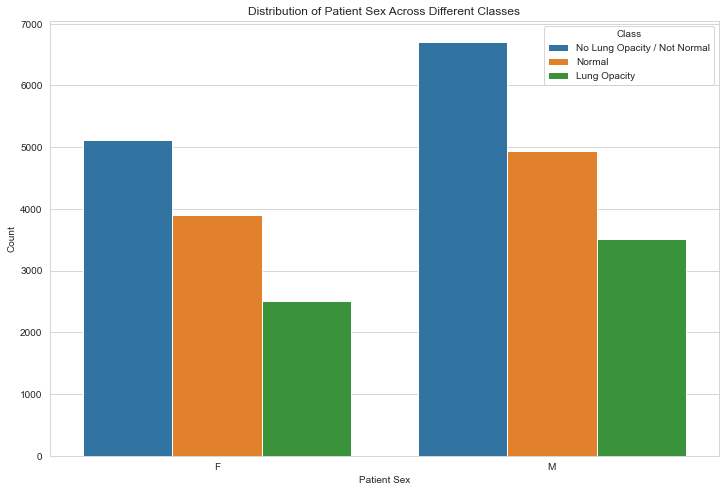

In [38]:
# bar plot for 'PatientSex' across different classes
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_meta_unq_labels_df, x='PatientSex', hue='class')
plt.title('Distribution of Patient Sex Across Different Classes')
plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

Based on the bar plot illustrating the distribution of sexes within each class, a few interesting observations can be made:

   - For female patients, the most common classification is 'No Lung Opacity / Not Normal', with a count of around 5100. This is followed by 'Normal' at approximately 3800 counts, and finally 'Lung Opacity' at around 2500 counts.

   - In male patients, similar trends are observed, but the counts are generally higher across all classes. The 'No Lung Opacity / Not Normal' class is again the most frequent, with around 6700 counts. The 'Normal' class has about 4900 counts, and the 'Lung Opacity' class is represented with around 3500 counts.

These observations indicate that both male and female patients are more often classified as 'No Lung Opacity / Not Normal' compared to other classes. However, male patients seem to have higher counts in each class compared to female patients.

Now let's calculate the conditional probability of belonging to a particular class given the patient's sex

In [39]:
# calculate the conditional probabilities of each class given the sex
total_counts_per_sex = merged_meta_unq_labels_df.groupby('PatientSex').size()
class_counts_per_sex = merged_meta_unq_labels_df.groupby(['PatientSex', 'class']).size()

conditional_prob_per_sex = class_counts_per_sex / total_counts_per_sex
conditional_prob_per_sex

PatientSex  class                       
F           Lung Opacity                    0.217225
            No Lung Opacity / Not Normal    0.443740
            Normal                          0.339035
M           Lung Opacity                    0.231439
            No Lung Opacity / Not Normal    0.442437
            Normal                          0.326124
dtype: float64

 we can observe the following:

   - For Female Patients:
        About 21.7% have 'Lung Opacity'.
        Around 44.4% fall under the category 'No Lung Opacity / Not Normal'.
        Approximately 33.9% are classified as 'Normal'.

   - For Male Patients:
        About 23.1% have 'Lung Opacity'.
        Around 44.2% are categorized as 'No Lung Opacity / Not Normal'.
        Approximately 32.6% are 'Normal'.

These probabilities help us understand the distribution of classes among different genders. Interestingly, the conditional probabilities for each class are quite similar between males and females. This suggests that gender might not be a strongly discriminating feature for pneumonia classification in this dataset.

Let's move to the last attribute 'ViewPosition', we will make similar statistics checks.

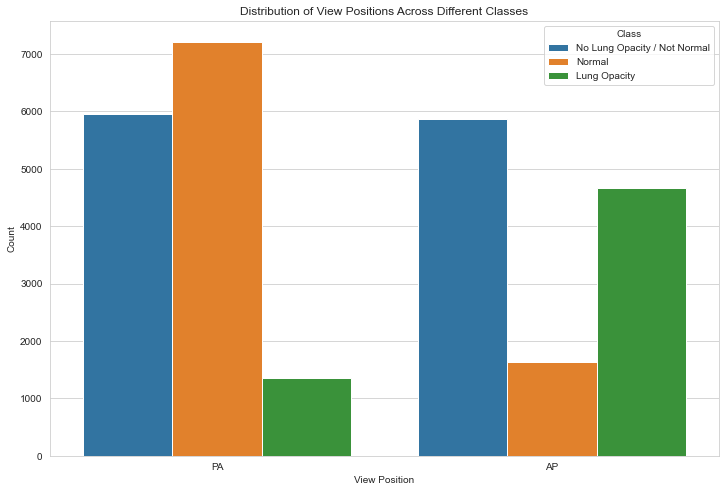

In [40]:
# bar plot for 'ViewPosition' across different classes
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_meta_unq_labels_df, x='ViewPosition', hue='class')
plt.title('Distribution of View Positions Across Different Classes')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

We can make some intriguing observations:

   - For the PA (Posteroanterior) View:
        The class 'No Lung Opacity / Not Normal' is represented with around 5,900 cases.
        The 'Normal' class is most frequent with about 7,200 cases.
        The 'Lung Opacity' class is the least frequent in this view, with approximately 1,400 cases.

   - For the AP (Anteroposterior) View:
        The 'No Lung Opacity / Not Normal' class has roughly 5,800 cases, similar to its representation in the PA view.
        The 'Normal' class is significantly less frequent in this view, with around 1,600 cases.
        The 'Lung Opacity' class is quite prevalent, with nearly 4,800 cases, contrasting sharply with its lower count in the PA view.

These findings suggest that the view position in the X-ray images may be an essential factor to consider. It appears that the 'Normal' class is more commonly associated with the PA view, while the 'Lung Opacity' class is more frequent in the AP view. This could potentially inform us about the diagnostic practices or the nature of the cases in the dataset. Therefore, view position might be a useful feature to include in our predictive models.

Now let's calculate the conditional probability of belonging to a particular class given the image view position

In [24]:
# calculate the conditional probabilities of each class given the image view position
total_counts_per_sex = merged_meta_unq_labels_df.groupby('ViewPosition').size()
class_counts_per_sex = merged_meta_unq_labels_df.groupby(['ViewPosition', 'class']).size()

conditional_prob_per_sex = class_counts_per_sex / total_counts_per_sex
conditional_prob_per_sex

NameError: name 'merged_meta_unq_labels_df' is not defined

The conditional probabilities further emphasize the importance of the view position in the X-ray images:

   - For the AP (Anteroposterior) View:
        The 'Lung Opacity' class constitutes about 38.3% of the cases, which is significantly higher than in the PA view.
        The 'No Lung Opacity / Not Normal' class makes up approximately 48.2%.
        The 'Normal' class is least frequent, at roughly 13.4%.

   - For the PA (Posteroanterior) View:
        The 'Lung Opacity' class is notably less frequent, making up only about 9.3%.
        The 'No Lung Opacity / Not Normal' class accounts for about 41% of the cases.
        The 'Normal' class is the most frequent, making up nearly 50% of this view position.

These conditional probabilities corroborate our earlier observations from the bar plot. The AP view is more commonly associated with cases labeled as 'Lung Opacity,' while the PA view has a higher proportion of 'Normal' cases. This nuanced information could be valuable when we are building and interpreting our machine learning models, as it suggests that the view position might interact with the class labels in a meaningful way.

Upon completing our statistical checks, several insights stand out:

   - Age: While the age distribution varies across different classes, no strong correlation with the target class was observed. However, it's worth noting that the age distribution is not uniform across classes.

   - Gender: Similarly, the gender distribution within each class showed that both males and females are fairly equally represented in each class. Again, no strong correlation was observed.

   - View Position: Here, significant differences were observed in the class distribution. The AP (Anterior-Posterior) view was more associated with 'Lung Opacity,' whereas the PA (Posteroanterior) view had a higher proportion of 'Normal' cases. Given that AP views are generally taken for patients who are more ill and cannot stand erect, this imbalance in target distribution is noteworthy.

To elaborate on the significance of the 'View Position' attribute, it is often said that 'AP' views are reserved for patients who are more ill and cannot stand, as explained in this [webpage](https://introductiontoradiology.net/courses/rad/cxr/technique3chest.html), which may explain the higher rate of 'Lung Opacity' in these images. This makes the 'View Position' a potentially crucial feature for our predictive model, considering that the distribution of AP and PA images in our dataset is nearly 50-50.

While age and gender didn't show a strong individual correlation with the pneumonia classifications, we'll keep them for now. Their interaction with other features and clinical relevance could make them valuable in the later stages of model development.

### Converting DICOM to PNG  (Cancelled - PNG's are WAY larger which I thought otherwise)
Up until this point, we've been working directly with DICOM files, which are the standard in medical imaging. DICOM files contain both metadata and image data, and they're rich in detail. However, for the scope of this project and to simplify the image processing pipeline, we're converting these DICOM files into PNG format.

Here are some reasons why this conversion is beneficial:

   - Compatibility: PNG files are more universally recognized and can be easily viewed and processed using standard image processing libraries.

   - Support: PNG files are well-supported across a range of image processing libraries, making it easier to manipulate and analyze the images.

   - Performance due File Size: DICOM files are typically larger than PNG files, which could become an issue when we start working with a large number of images. PNGs will be faster to read into memory, making our data pipeline more efficient.

   - Metadata Isolation: We've already extracted the relevant metadata from the DICOM files, so at this point, we're only interested in the image data for model training.

Also, as written in this [webpage](https://www.intelerad.com/en/2023/02/23/handling-dicom-medical-imaging-data/), Lossless compression reduces the file without diminishing the quality of the image. PNG is a Lossless compression file type.

In [6]:
# CANCELLED

# # source directory containing the DICOM (.dcm) files
# # 'path_to_train_dicoms_dir' is defined at the start of the notebook
# SRC_PATH = path_to_train_dicoms_dir

# # destination directory where the converted PNG files will be saved
# DST_PATH = os.path.join(TRAIN_DATADIR, 'train_images_clean')

# # create the destination directory if it doesn't exist
# if not os.path.exists(DST_PATH):
#     os.makedirs(DST_PATH)

# # convert DICOM to PNG function
# def convert_to_png(patientId, src_path=SRC_PATH, dst_path=DST_PATH):
#     try:
#         dicom_file_path = os.path.join(src_path, f"{patientId}.dcm")
#         png_file_path = os.path.join(dst_path, f"{patientId}.png")
        
#         # because jupyter notebook re-running, check if the file already exists
#         if os.path.exists(png_file_path):
#             return

#         # Read the DICOM file
#         dicom_data = pydicom.dcmread(dicom_file_path)

#         # Convert the DICOM pixel array to a PIL image
#         image = Image.fromarray(dicom_data.pixel_array)

#         # Save the PIL image as a PNG file
#         image.save(png_file_path)
#     except Exception as e:
#         logging.error(f"An exception occurred while processing the file {patientId}.dcm: {e}")

# # list of all patient IDs corresponds to the dicom images
# patient_ids = [os.path.splitext(f)[0] for f in os.listdir(path_to_train_dicoms_dir)]

# # convert
# for pid in tqdm(patient_ids, desc="Converting"):
#     convert_to_png(pid, SRC_PATH, DST_PATH)
    

# MULTIPROCESS POOL DOES NOT WORK IN INTERACTIVE INTERPERTER SUCH AS JUPYTER, STILL, SAVING IT FOR FUTURE USE
# # multiprocessing to speed up the conversion process
# # this will make use of all CPU cores
# with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
#     # initialize the progress bar
#     pbar = tqdm(
#           total=len(patient_ids),
#           desc="Converting"
#     )
#     # start the conversion
#     for _ in p.imap_unordered(convert_to_png, patient_ids):
#         pbar.update(1)  # Update the progress bar
#     pbar.close()  # Close the progress bar when done


### Visualization
Now that we've dug deep into the metadata, let's get a visual feel for the images themselves.

Before that, we will merge the boxes dataframe ('train_labels.csv' with the Target) with the class dataframe ('detailed_class_info' NOT unique pids) and the metadata dataframe, so we can use both to display all the relevant information together.

In [56]:
# jupyter re-run check
if not os.path.exists(os.path.join(TRAIN_DATADIR, 'box_labels_meta.csv')):
    # concat labels and box dataframes
    assert box_df['patientId'].values.tolist() == labels_df['patientId'].values.tolist(), 'Patient Id columns are different'
    box_labels_merged_df = pd.concat([box_df, labels_df.drop(labels=['patientId'], axis=1)], axis=1)

    # add the metadata information too
    # using 'left' ensures that all rows in box_labels_merged_df will be included,
    # the metadata will be duplicated for rows with the same 'patientId'
    full_df = pd.merge(box_labels_merged_df, metadata_df, on='patientId', how='left')

    # save to a csv file
    full_df.to_csv(os.path.join(TRAIN_DATADIR, 'box_labels_meta.csv') ,index=False)
# load if exists
else:
    full_df = pd.read_csv(os.path.join(TRAIN_DATADIR, 'box_labels_meta.csv'))

# row count assertion
assert full_df.shape[0] == box_df.shape[0]

OK. all good. Now lets define some functions for visualization

In [82]:
def get_boxes_per_patient(df, pId):
    '''
    Given the dataset and one patient ID, 
    return an array of all the bounding boxes and their labels associated with that patient ID.
    '''
    try:
        boxes = df.loc[df['patientId']==pId][['x', 'y', 'width', 'height', 'class', 'Target']].values
        return boxes
    except Exception as e:
        logging.error(f'An error occurred while retrieving boxes for patient ID {pId}: {e}')
        return np.array([])

def get_dcm_data_per_patient(pId, path_to_dicoms_dir):
    '''
    Given one patient ID and the path to the dicoms images directory, 
    return the corresponding dicom data.
    '''
    return pydicom.read_file(f'{path_to_dicoms_dir}/{pId}.dcm')

def display_image_per_patient(df, pId, path_to_dicoms_dir, angle=0.0):
    '''
    Given one patient ID, the dataset, the path to the dicoms images directory, and the angle,
    display the corresponding dicom image with overlaying boxes and class annotation.
    '''
    dcm_data = get_dcm_data_per_patient(pId, path_to_dicoms_dir=path_to_dicoms_dir)
    dcm_img = dcm_data.pixel_array
    boxes = get_boxes_per_patient(df, pId)
    plt.imshow(dcm_img, cmap='gray')
    plt.axis('off')
    
    class_color_dict = {'Normal' : 'green',
                        'No Lung Opacity / Not Normal' : 'orange',
                        'Lung Opacity' : 'red'}

    if len(boxes)>0:
        for box in boxes:
            x, y, w, h, c, t = box 
            patch = Rectangle((x,y), w, h, color=class_color_dict.get(c, 'red'), 
                              angle=angle, fill=False, lw=4, joinstyle='round', alpha=0.6)
            plt.gca().add_patch(patch)
            
    plt.text(10, 50, c, color=class_color_dict.get(c, 'white'), size=20, 
             bbox=dict(edgecolor=class_color_dict.get(c, 'red'), facecolor='black', alpha=0.7, lw=2))

def display_grid_of_sample_images(df, num_samples, path_to_dicoms_dir):
    '''
    Given the dataset, number of samples, and the path to the dicoms images directory,
    display a grid of sample images.
    '''
    
    num_rows = int(np.sqrt(num_samples))
    num_cols = int(np.ceil(num_samples / num_rows))
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.4, wspace=0.4))
    
    sample_patient_ids = random.sample(df['patientId'].unique().tolist(), num_samples)
    
    class_color_dict = {'Normal' : 'green',
                        'No Lung Opacity / Not Normal' : 'orange',
                        'Lung Opacity' : 'red'}
    
    for i, ax in enumerate(axes.flat):
        if i >= num_samples:
            ax.axis('off')  # turn off extra subplots
            continue

        pId = sample_patient_ids[i]
        dcm_data = get_dcm_data_per_patient(pId, path_to_dicoms_dir=path_to_dicoms_dir)
        dcm_img = dcm_data.pixel_array
        ax.imshow(dcm_img, cmap='gray')
        ax.set_title(f'Patient ID: {pId}')
        
        # get the class label for the current patient ID
        class_label = df[df['patientId'] == pId]['class'].iloc[0]
        
        label_color = class_color_dict.get(class_label, 'white')
        
        # display the class label on the image
        ax.text(10, 50, class_label, color=label_color, fontsize=14, bbox=dict(facecolor='black', alpha=0.7))
    
def compare_resized_images(original_img, resized_img, title1='Original', title2='Resized'):
    '''
    Display original and resized images side by side for comparison.
    '''
    fig, axes = plt.subplots(1, 2, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    axes[0].imshow(original_img, cmap='gray')
    axes[0].set_title(title1)

    axes[1].imshow(resized_img, cmap='gray')
    axes[1].set_title(title2)
    
def plot_pixel_intensity_histogram(pId, path_to_dicoms_dir):
    '''
    Plot histogram of pixel intensity values for a given patient's DICOM image.
    '''
    # load DICOM data
    dcm_data = get_dcm_data_per_patient(pId, path_to_dicoms_dir)
    dcm_img = dcm_data.pixel_array
    
    # plot histogram
    plt.figure(figsize=(10, 5))
    plt.hist(dcm_img.ravel(), bins=256, color='gray', alpha=0.7, rwidth=0.8)
    plt.title(f'Pixel Intensity Histogram for Patient {pId}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.7)
    plt.show()

OK, good. First step is to display a selection of sample images. This is a crucial step because it gives us an initial sense of what kinds of images we're working with.

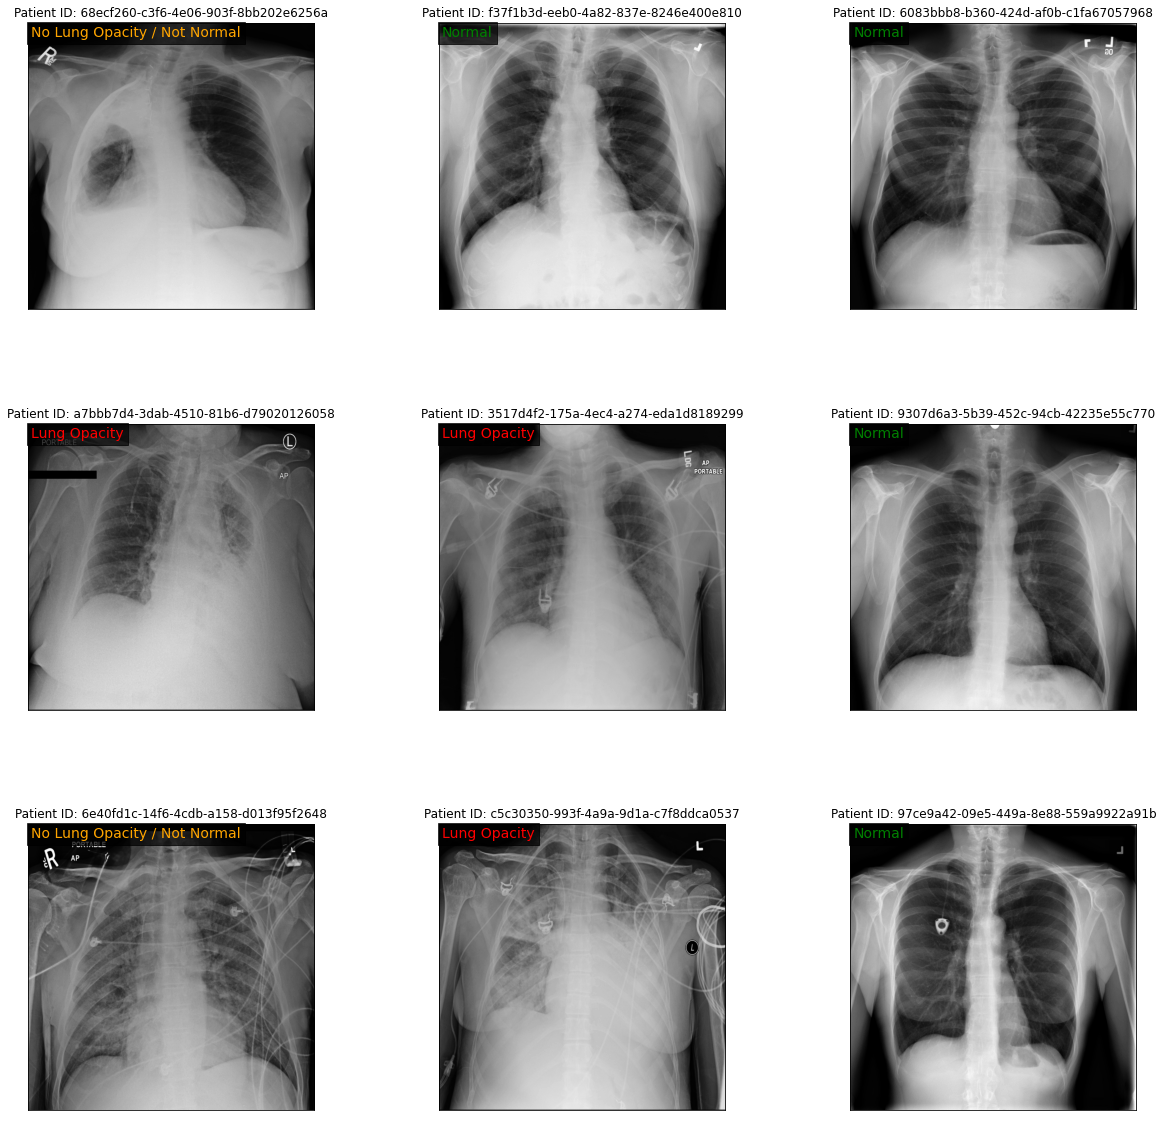

In [54]:
num_samples = 9
display_grid_of_sample_images(full_df, num_samples, path_to_train_dicoms_dir)

Well, using the naked eye, it is evident why images labeled as 'Lung Opacity,' indicative of pneumonia, are categorized as such; they are noticeably different from the 'Normal' images. However, making an accurate judgment isn't always straightforward. For instance, at first glance, the image in the top-left corner might also appear to be a 'Lung Opacity' case, but it actually falls under 'No Lung Opacity / Not Normal.' This suggests that some 'No Lung Opacity / Not Normal' cases can be easily confused with 'Lung Opacity' cases, making them difficult to distinguish.

Lets try to see some samples and check for bounding boxes

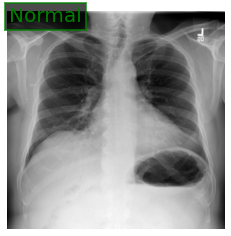

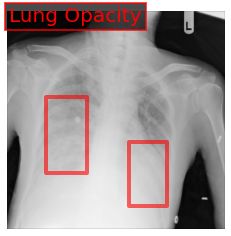

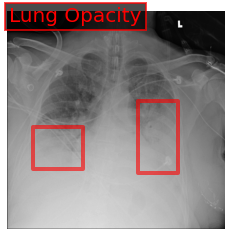

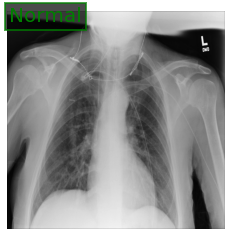

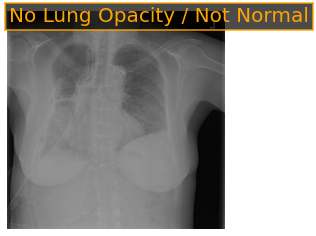

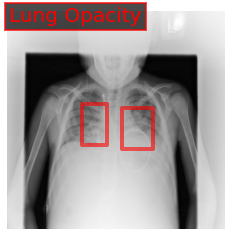

In [77]:
for i in range(6):
    plt.figure()
    pId = full_df['patientId'].sample(1).values[0]
    display_image_per_patient(full_df, pId, path_to_train_dicoms_dir)
    plt.show()

OK. In the 'Lung Opacity' cases, there are areas where the tissue appears denser or cloudier, suggesting an abnormality. However, it's important to note that these indications are not always immediately clear to the naked eye.

After visualizing the chest X-ray images, it's evident that each class—'Normal,' 'No Lung Opacity / Not Normal,' and 'Lung Opacity'—presents distinct visual characteristics. But can these differences be quantitatively captured as well?

To answer this question, we'll try to look at the pixel intensity distribution of sample images from each class. Pixel intensity histograms can provide valuable insights into the distribution of pixel values.

By comparing the histograms for each class, we aim to identify any significant variations in pixel intensity distribution that could be characteristic of each class.

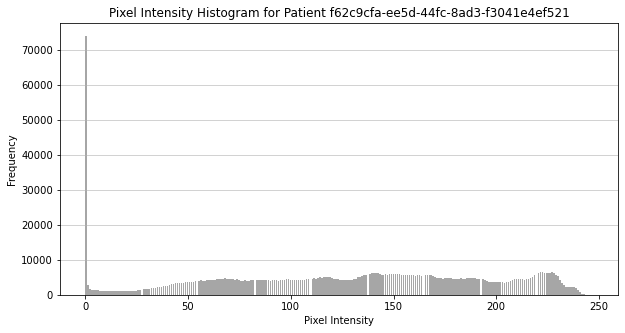

In [89]:
pId_normal = full_df[full_df['class'] == 'Normal']['patientId'].sample(1).values[0]
pId_not_normal = full_df[full_df['class'] == 'No Lung Opacity / Not Normal']['patientId'].sample(1).values[0]
pId_lung_opacity = full_df[full_df['class'] == 'Lung Opacity']['patientId'].sample(1).values[0]

plot_pixel_intensity_histogram(pId_normal, path_to_train_dicoms_dir)

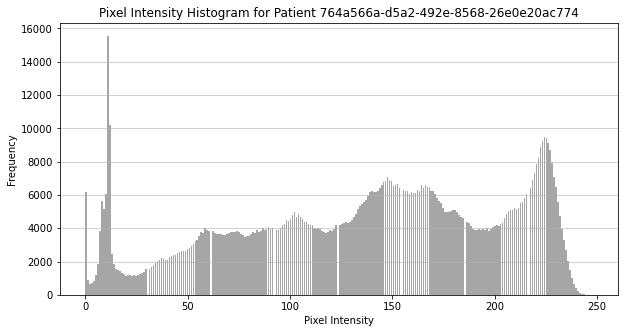

In [90]:
plot_pixel_intensity_histogram(pId_not_normal, path_to_train_dicoms_dir)

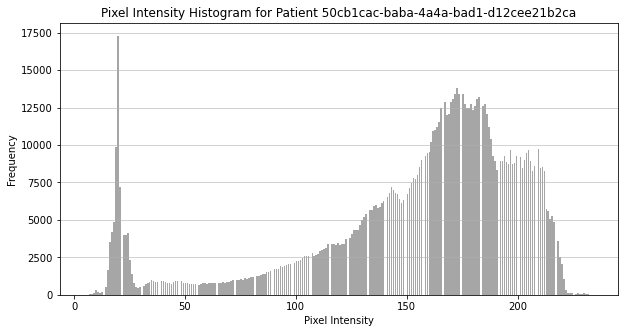

In [91]:
plot_pixel_intensity_histogram(pId_lung_opacity, path_to_train_dicoms_dir)

Well, those are just one of each class random samples, but lets talk about what we can observe here,

Normal Class

   - High frequency at x=0: The extremely high frequency at a pixel intensity of zero likely corresponds to the dark background of the X-ray images, which makes sense for a 'Normal' lung where you'd expect a lot of air (depicted as dark regions in X-rays).
   - Moderate frequencies at higher intensities: The moderate range of pixel intensities from 1 to 250 suggests that the lung tissue and structures like bones are fairly consistent in appearance, which is what we would expect in a 'Normal' lung X-ray.

No Lung Opacity / Not Normal Class

   - Lower frequency at x=0: A lower frequency at zero compared to 'Normal' class suggests that there's more going on in the image than just the background and lung air. This is indicative of some abnormalities, although not necessarily pneumonia.
   - Peak at around x= ~10: This suggests a specific texture or structure that is prevalent in these 'Not Normal' images. It could be related to a variety of conditions that are not pneumonia but still abnormal.
   - Variable frequencies at higher intensities: The wide distribution from x=50 to x=250 indicates a more complex pattern of lung tissue and possibly other abnormalities, making them difficult to distinguish from 'Lung Opacity' at times.

Lung Opacity Class

   - Peak around x= ~23: A high frequency at this pixel intensity suggests that there's a distinct feature common in these images, likely corresponding to the lung opacities that are indicative of pneumonia.
   - Diverse range at higher intensities: The wide spread of pixel intensities in the higher range likely represents the varying severity and stages of pneumonia, as different parts of the lung get affected to varying degrees.

So, based on these random samples, we can say that the 'Normal' class is fairly easy to distinguish due to its consistent pixel intensity distribution, mainly skewed towards darker values. However, distinguishing between 'No Lung Opacity / Not Normal' and 'Lung Opacity' is a more complex task. Both classes exhibit a broader range of pixel intensities, sometimes overlapping in their patterns. While these observations are instructive, it's important to remember that they are based on a small sample and should not be taken as definitive.

As mentioned previously in this notebook, the plan is to train models on images of different resolutions: one at 256x256 pixels and another at 320x320 pixels. So it's pretty essential to understand the impact of this resizing operation on the images, lets compare them to the original 1024x1024 pixels image:

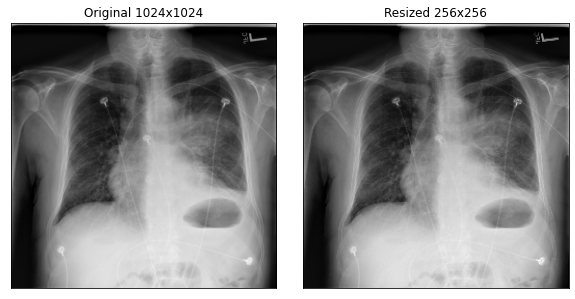

In [95]:
# sample patient id
pId = full_df['patientId'].sample(1).values[0]
# dicom data
dcm_path = os.path.join(path_to_train_dicoms_dir, f'{pId}.dcm')
dcm_data = pydicom.read_file(dcm_path)
# dicom image
dcm_img = dcm_data.pixel_array
# resize
resized_img = cv2.resize(dcm_img, (256, 256))
# plot both
compare_resized_images(dcm_img, resized_img, title1='Original 1024x1024', title2='Resized 256x256')

Barley any change. I'll skip checking 320x320.

In [11]:
from sklearn.model_selection import train_test_split

##### pytorch ##### 
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torch import nn as nn
import torch.nn.functional as F
import torchvision as tv
import albumentations as A

## Classification 
As mentioned in the Introduction, this phase concentrates on evaluating chest X-ray images to ascertain the presence of pneumonia. Utilizing a classification-driven approach, each image undergoes an initial analysis to determine a likelihood score indicating the potential presence of pneumonia. This score is pivotal, as it not only provides a preliminary assessment but also guides the subsequent, more detailed detection phase. 
### Data Augmentation Discussion - Why, Which, How it Looks 
data augmentation is pivotal for training models. It brings in the much-needed diversity to our limited dataset (our dataset is not big 30k~ samples are not much in this field), accounting for the variations we often see in medical images due to different imaging equipment, patient positioning, and exposure levels. This approach not only helps in avoiding overfitting — where the model memorizes specific training data patterns that don't apply broadly — but also ensures our model is well-prepared for the real-world scenarios it will encounter.

Based on the nature of chest X-rays and the objective of accurately detecting pneumonia, the following augmentation techniques are chosen:

- Color Inversion (50% probability): To prepare the model for scenarios where the image contrast might be inverted due to different radiology practices or image handling.


- Horizontal Flip (50% probability): This mirrors patient orientation variability. It’s crucial for models to recognize conditions irrespective of such flips, provided that they do not confuse features that are specific to one side of the lungs.


- Additional Augmentation (50% probability one option): Each image has a 50% chance of being further augmented with one of the following techniques:
    - Gaussian Smoothing with Kernel Size Variation (kernel size randomly chosen between 3 and 7 pixels): Simulates slight blurring that might occur due to patient movement or imaging issues. The choice of kernel size range aims to approximate the effect of a Gaussian smoothing where the sigma (spread of the blur) varies. A smaller kernel size results in less blurring (akin to a lower sigma), and a larger kernel size increases blurriness (similar to a higher sigma). 
    
    - Crop (min 85% max 95% crop size randomaly chosen within this range): Adjusts the field of view or focuses on specific lung regions, which can vary in clinical images. 
    
    - Rotation (randomly chosen between -15 to 15 degrees): Mimics small variations in patient positioning during the X-ray procedure.
    
    - Adjust Gamma (gamma value randomly chosen between 0.75 and 1.25): Alters image brightness, simulating the effect of different radiation doses or sensor sensitivity.

Each augmentation is selected to reflect a realistic variation that could occur in the medical imaging domain, especially in chest X-rays. This approach ensures that the model is not only trained on diverse image representations but also on scenarios that it is likely to encounter in real-world medical settings.

Lets see those augmentations along side a sample of an image

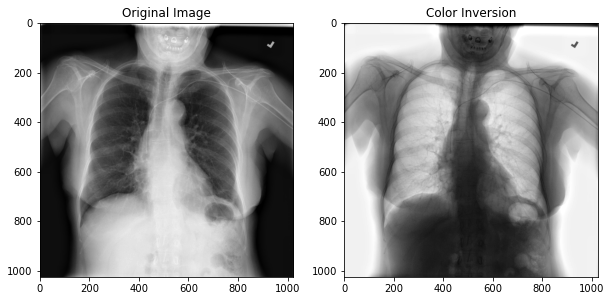

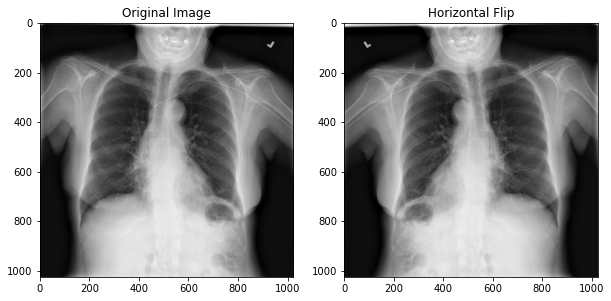

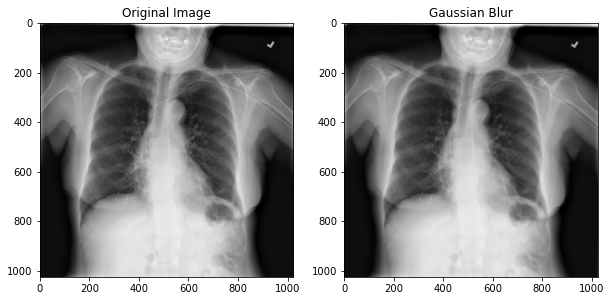

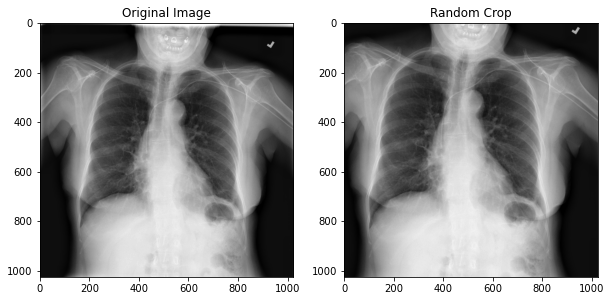

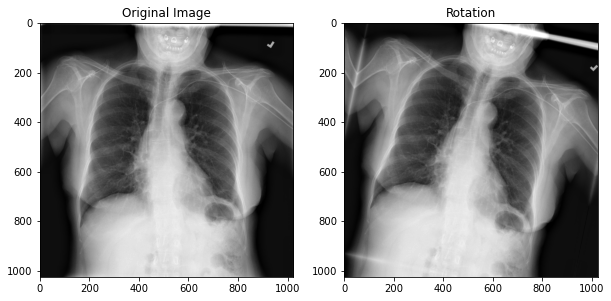

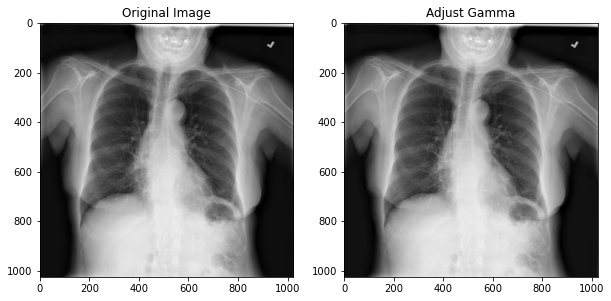

In [21]:
# load sample image function
def load_random_dicom_image(dir):
    random_file = random.choice(os.listdir(dir))
    file_path = os.path.join(dir, random_file)
    dcm_data = pydicom.dcmread(file_path)
    img = dcm_data.pixel_array
    img = img / np.max(img)  # to 0-255 just in case
    return (img * 255).astype(np.uint8)  # scale to 0-255

# visualization function
def visualize_augmentation(orig_img, aug_img, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(orig_img, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(aug_img, cmap='gray')
    plt.title(title)
    plt.show()

# load sample dicom image
img = load_random_dicom_image(path_to_train_dicoms_dir)

# individual augmentations
color_inversion = lambda img: np.invert(img)
horizontal_flip = A.HorizontalFlip(p=1)
gaussian_blur = A.GaussianBlur(blur_limit=(3, 7), p=1)
random_crop = A.RandomSizedCrop(min_max_height=(850, 950), height=1024, width=1024, p=1)
rotate = A.Rotate(limit=15, p=1)
adjust_gamma = A.RandomGamma(gamma_limit=(75, 125), p=1)

augmentations = {
    'Color Inversion': color_inversion,
    'Horizontal Flip': horizontal_flip,
    'Gaussian Blur': gaussian_blur,
    'Random Crop': random_crop,
    'Rotation': rotate,
    'Adjust Gamma': adjust_gamma
}

# apply each augmentation and visualize
for aug_name, aug in augmentations.items():
    if aug_name == 'Color Inversion':
        aug_img = color_inversion(img)
    else:
        aug_img = aug(image=img)['image']
        
    visualize_augmentation(img, aug_img, aug_name)

I have doubts about the color inversion, I'll pay attention to performence with and without it.

### Data Splitting

We need to divide our dataset into distinct sets for training, validation, and testing. Given the absence of separate labels for our test set, as mentioned before, we'll partition our existing training dataset to fulfill all these roles. Notice we just splitting pIds for now, the datasets will be created later on with pytorch custom dataset.

In [22]:
# load labels dataframe
labels_df = pd.read_csv(os.path.join(TRAIN_DATADIR, 'detailed_class_info.csv'))
# load metadata
metadata_df = pd.read_csv(os.path.join(TRAIN_DATADIR, 'metadata.csv'))
# merge
classifier_df = labels_df.merge(metadata_df, on='patientId')
# we interested in pIds, unique ones
classifier_df = classifier_df.drop_duplicates(subset='patientId')
# get pIds and labels for stratified splitting
pIds = classifier_df['patientId']
labels = classifier_df['class']

# split will be 1000 samples for test, 10% from the remained dataset for validation and the rest for training.
test_size = 1000
val_frac = 0.10
pIds_train_val, pIds_test, labels_train_val, _ = train_test_split(pIds, labels, test_size=test_size, random_state=42, stratify=labels)
pIds_train, pIds_val, labels_train, labels_val = train_test_split(pIds_train_val, labels_train_val, test_size=val_frac, random_state=42, stratify=labels_train_val)

# convert to lists of pIds, because train_test_split returns numpy arrays (just for convenient)
pIds_train, pIds_val, pIds_test = pIds_train.tolist(), pIds_val.tolist(), pIds_test.tolist()
print(f'out of {len(pIds_train_val)} pIds, {val_frac*100}% will be used for validation')
print(f'{len(pIds_train)} images will go into training while {len(pIds_val)} for validation')
print(f'{test_size} images will be tested (test set)')


out of 25684 pIds, 10.0% will be used for validation
23115 images will go into training while 2569 for validation
1000 images will be tested (test set)


### Dataset

COMPLETE DESCRIPTION
 


In [23]:
class PneumoniaClassifyDataset(Dataset):
    """
        Pneumonia dataset for classification, contains DICOM (.dcm format) x-ray lung images.
        Each patient has one image named patientId.dcm.
    """
    def _init_(self, 
               data_dir,
               df,
               mode, 
               pIds, 
               resize_to=1024, 
               transforms=None, 
               augmentation_dict=False, 
               num_classes=2):
        """
        :param data_dir: path to the folder with the images folder and dataset
        :param df: classifier (no bboxes, metadata + labels, unique) pandas Dataframe to retrieve labels 
        :param mode: 'train', 'val' or 'test'
        :param pIds: list of patient ids
        :param resize_to: integer represent the size to resize the image
        :param transforms: transformation to the images (like to tensor, normalization, etc.)
        :param augmentation_dict: Dictionary with various augmentation techniques
        :param num_classes: number of classes the classifier is going to train on (for correct labels)
        """
        
        # expanduser will expand the path to the user home directory if '~' is given (useful for running on different machines with the same relative structure)
        self.data_dir = os.path.expanduser(data_dir)
        self.df = df
        self.mode = mode
        if self.mode not in ['train', 'val', 'test']:
            raise RuntimeError('Invalid mode ' + self.mode + ', only \'train\', \'val\' or \'test\'')
        self.pIds = pIds
        self.resize_to = resize_to
        if resize_to != int(resize_to) or resize_to < 0 or resize_to > 1024:
            raise RuntimeError(f'Image resize {resize_to} must be an integer / cannot be less than 0 / cannot be more than 1024')
        self.transforms = transform
        self.augmentation_dict = augmentation_dict
        self.num_classes = num_classes
        # label map to index depends on how many classes there is
        self.label_map = create_label_map(num_classes)
        # IMPORTANT: here its fixed 'train_dicoms' because in my case I splitted, the images for training to train, val,
        # test so all of them in the train images folder. This might not be the usual case.
        self.images_dir = os.path.join(data_dir, 'train_dicoms')
        
        def create_label_map(self, num_classes):
            """
            create map from classes name to indices based on the number of classes 'num_classes'
            """
            if num_classes == 2:
                return {
                    'Normal': 0,
                    'No Lung Opacity / Not Normal': 0,
                    'Lung Opacity': 1
                }
                
            elif num_classes == 3:
                return {
                    'Normal': 0,
                    'No Lung Opacity / Not Normal': 1,
                    'Lung Opacity': 2
                }
            else:
                raise RuntimeError(f'number of classes {num_classes} not supported, only 2 or 3')
        
        def __len__(self):
            return len(self.pIds)
        
        def __getitem__(self, ndx):
            # retrieve patient id at the right index
            patient_id = self.pIds[ndx]
            # get the corresponds patient id label.
            # values will convert the the pandas Series with the corresponds class into numpy array
            label_name = self.df[df['patientId'] == patient_id]['class'].values[0]
            # convert the label to integer
            label = self.label_map[label_name]
            # transform the label to tensor; 
            # we use dtype = long because certain pytorch loss functions expects class indices to be in a long format
            label_t = torch.tensor([label], 
                                   dtype=torch.long)
            
            # load image dicom file (pixel_array == numpy array)
            img_np = pydicom.dcmread(os.path.join(self.images_dir, patient_id+'.dcm'))
            
            # normalize the image to have pixel values in the range of 0-255 (just in case, not supposed to be necessary)
            img_np = img_np / np.max(img_np) * 255
            img_np = img_np.astype(np.uint8)
            
            # check if image is square (NxN)
            if (img_np.shape[0] != img_np.shape[1]):
                raise RuntimeError(f'image shape {img_np.shape} isn\'t square as it should be')
                
            # resize shape to network shape
            img_shape = self.resize_to
            # resize image (still numpy array)
            # cv2.resize() preserves the pixel values (remains 0-255 and not 0-1) which is what pytorch want
            img_np = cv2.resize(img_np, (img_shape, img_shape))
            
            # apply augmentation (NOT responsible for converting to tensor)
            if self.augmentation:
                augmented = self.get_augmented_img(img, self.mode)
                img_np = augmented['image']
            
            # convert to tensor; 
            # torchvision.transforms ToTensor can take numpy array representing image, it'll also add trailing channel
            # for grayscale images (as we got here) so the format will be 1xHxW
            img_t = tv.transforms.ToTensor(img_np)
            
            # apply transforms (usually custom normalization based on the pretrained model)
            if self.transforms is not None:
                img_t = self.transforms(img_t)
                
            return img_t, label_t
        
        def get_augmented_img(self, img):
            """
            training data will be augmented with 50% probability for each of the next augmentations:
            1. 
            
            """
            # TBD
            return img
            
        